# 1. Introduction



In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#data = pd.read_csv('/Users/hungduong/Documents/MSBA UofU/MSBA 4th/MKTG 6620/churn_train.csv')

### Business Problem

### Leakage Policy

In [1]:
ivnvonwvwrpv

NameError: name 'ivnvonwvwrpv' is not defined

### Data overview and EDA

In [15]:
# Data highview
pd.set_option('display.max_columns', None)
data.head()

,ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,yrhdgfy_4741,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,yrhdgfy_4154,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,yrhdgfy_5863,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,yrhdgfy_4870,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
4,yrhdgfy_4813,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


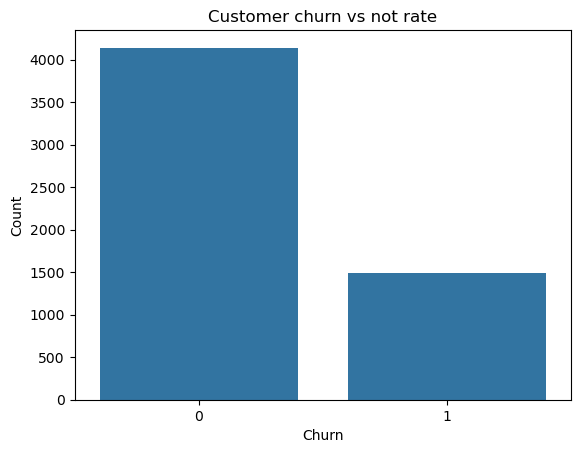

Churn rate is 26.54%


In [ ]:
# Looks at Target variable
data['Churn'] = data['Churn'].map({'No':0, 'Yes':1})

sns.countplot(x='Churn', data=data)
plt.title('Customer churn vs not rate')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#Target rate is imbalance
print(f"Churn rate is {data['Churn'].mean() * 100:.2f}%")


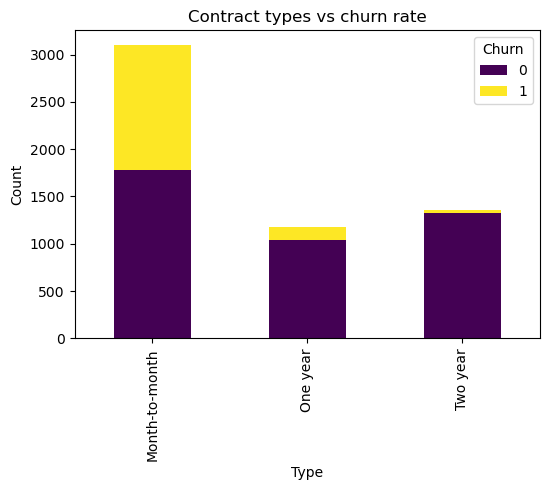

In [27]:
# How do contract type correlate with Churn?
pd.crosstab(data['Contract'], data['Churn']).plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    colormap='viridis'
)

plt.title('Contract types vs churn rate')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

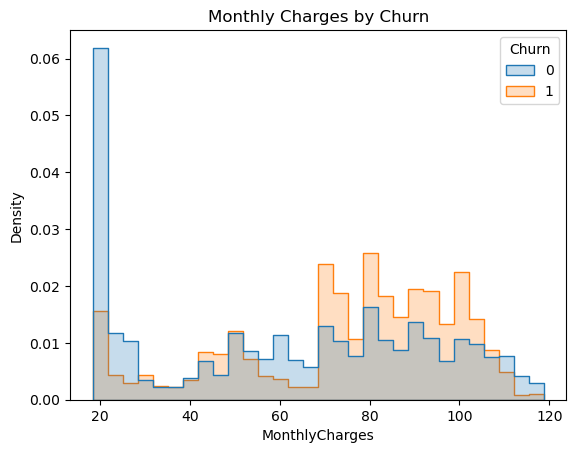

In [ ]:
# How do monthly charges influence Churn?
sns.histplot(data=data, x='MonthlyCharges', hue='Churn',
             bins=30, stat='density', common_norm=False, element='step')
plt.title('Monthly Charges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.show()

This plot is showing that people with low monthly charges tends not to churn, around $20-$40.


However, the group that churn the most seems to be high monthly charges ones noticeably around $70-$110.

In [ ]:
# Prepare data for ML
data_ml = data.copy
data_ml = pd.get_dummies(['gender','SeniorCitizen','Partner','Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                          'OnlineSecurity', ''])

In [20]:
data.dtypes

ID                   object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

# 2. Machine Learning

### Simple baseline Logistic Model